# training PEAKO

Notebook to show PEAKO training (still experimental). Alternatively run the .py application

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# the following imports are just for development
# import importlib.util
# import sys
# spec = importlib.util.spec_from_file_location("peako.TrainingData", "../pyPEAKO/pypeako/peako.py")
# pypeako = importlib.util.module_from_spec(spec)
# sys.modules["peako.TrainingData"] = pypeako
# spec.loader.exec_module(pypeako)

import pypeako
import glob
import numpy as np

In [3]:
cropped_files = glob.glob('/srv/data/shareddata/hyytiala/marked_peaks_24*cropped*.NC')
print(cropped_files)

['/srv/data/shareddata/hyytiala/marked_peaks_240114_080000_P09_ZEN_cropped_x701_879_y4_177.LV0.NC']


In [4]:
# training for chirp 2
P_2 = pypeako.Peako(
              cropped_files, plot_dir='plots/',
    k=0,
    training_params={'t_avg': [0], 'h_avg': [0], 'span': np.arange(0.05, 0.45, 0.1), 'polyorder':[2],
             'width': np.arange(0., 1, 0.5), 'prom': np.arange(0, 2.5, 1)},
    save_similarities=True,
    verbosity=0, temporary_files_flag=False,
     )

P_2.mask_chirps([0, 2]) # mask first and third chirp



P_2.create_training_mask()
print('number of marked spectra in this chirp:', P_2.get_training_sample_number())

/opt/tljh/user/lib/python3.12/site-packages/pypeako/utils.py:110: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 10. This could degrade performance. Instead, consider rechunking after loading.
  spec_data = [xr.open_dataset(l, mask_and_scale=True, chunks={"time":10}) for l in filenames]


number of marked spectra in this chirp: 11


In [5]:
result = P_2.train_peako()


/opt/tljh/user/lib/python3.12/site-packages/pypeako/peako.py:494: RuntimeWarning: All-NaN slice encountered
  min_vals = np.tile(np.nanmin(spec_chunk, axis=2)[:, :, np.newaxis], (1, 1, spec_chunk.shape[2]))
/opt/tljh/user/lib/python3.12/site-packages/pypeako/peako.py:494: RuntimeWarning: All-NaN slice encountered
  min_vals = np.tile(np.nanmin(spec_chunk, axis=2)[:, :, np.newaxis], (1, 1, spec_chunk.shape[2]))
/opt/tljh/user/lib/python3.12/site-packages/pypeako/peako.py:494: RuntimeWarning: All-NaN slice encountered
  min_vals = np.tile(np.nanmin(spec_chunk, axis=2)[:, :, np.newaxis], (1, 1, spec_chunk.shape[2]))
/opt/tljh/user/lib/python3.12/site-packages/pypeako/peako.py:494: RuntimeWarning: All-NaN slice encountered
  min_vals = np.tile(np.nanmin(spec_chunk, axis=2)[:, :, np.newaxis], (1, 1, spec_chunk.shape[2]))
/home/jupyter-jhcustadmin/.local/lib/python3.12/site-packages/numpy/_core/numeric.py:362: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_valu

number of samples: 11


In [9]:
result

{'training result': [{'t_avg': 0,
   'h_avg': 0,
   'span': np.float64(0.15000000000000002),
   'polyorder': 2,
   'width': np.float64(0.0),
   'prom': np.float64(1.0),
   'similarity': np.float64(92.78083038330078)},
  {'t_avg': 0,
   'h_avg': 0,
   'span': np.float64(0.05),
   'polyorder': 2,
   'width': np.float64(0.0),
   'prom': np.float64(2.0),
   'similarity': np.float64(85.6003646850586)},
  {'t_avg': 0,
   'h_avg': 0,
   'span': np.float64(0.15000000000000002),
   'polyorder': 2,
   'width': np.float64(0.0),
   'prom': np.float64(2.0),
   'similarity': np.float64(84.74494934082031)}]}

finding peaks for all times and ranges...


/opt/tljh/user/lib/python3.12/site-packages/pypeako/peako.py:494: RuntimeWarning: All-NaN slice encountered
  min_vals = np.tile(np.nanmin(spec_chunk, axis=2)[:, :, np.newaxis], (1, 1, spec_chunk.shape[2]))
/opt/tljh/user/lib/python3.12/site-packages/pypeako/peako.py:494: RuntimeWarning: All-NaN slice encountered
  min_vals = np.tile(np.nanmin(spec_chunk, axis=2)[:, :, np.newaxis], (1, 1, spec_chunk.shape[2]))
/home/jupyter-jhcustadmin/.local/lib/python3.12/site-packages/numpy/_core/numeric.py:362: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
/home/jupyter-jhcustadmin/.local/lib/python3.12/site-packages/numpy/_core/numeric.py:362: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
/home/jupyter-jhcustadmin/.local/lib/python3.12/site-packages/numpy/_core/numeric.py:362: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
/home/j

loop, k:0


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'spectrum at 2527 m, 08:43:05'}, xlabel='Doppler Velocity [m s$^{-1}$]', ylabel='Reflectivity [dBZ]'>)

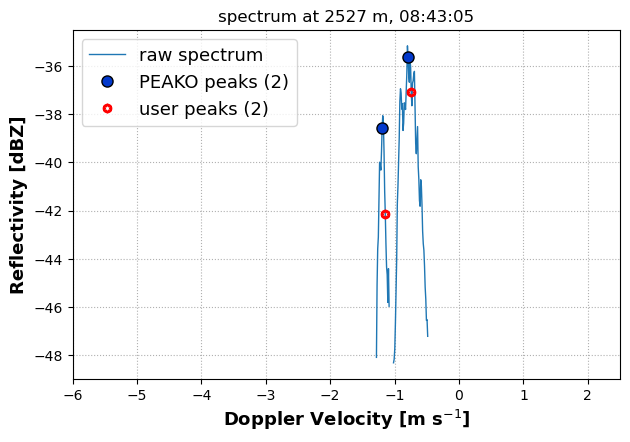

In [7]:
P_2.plot_user_algorithm_spectrum(plot_smoothed=False)

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes3D: xlabel='height averages', ylabel='time averages', zlabel='similarity'>,
         <Axes3D: xlabel='prom', ylabel='polyorder', zlabel='similarity'>],
        [<Axes3D: xlabel='prom', ylabel='time averages', zlabel='similarity'>,
         <Axes3D: xlabel='width', ylabel='span', zlabel='similarity'>]],
       dtype=object))

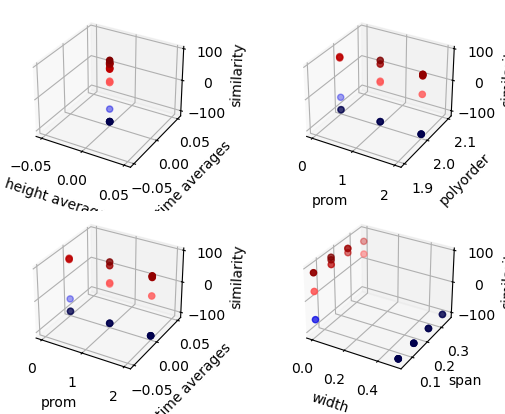

In [10]:
P_2.plot_3d_plots()